In [127]:
import pandas as pd
import numpy as np
from tqdm import notebook as nb
import pickle
import matplotlib.pyplot as plt

In [299]:
df_85 = pd.read_csv('data/X_85_v2.csv')
df_26 = pd.read_csv('data/X_26_v2.csv')
df_cr2 = pd.read_csv('data/X_cr2.csv')

In [300]:
cuenca = 'santiago'

In [301]:
df_85 = df_85[df_85[cuenca]==1]
df_26 = df_26[df_26[cuenca]==1]
df_cr2 = df_cr2[df_cr2[cuenca]==1]

In [302]:
df_cr2['year'] = np.array(df_cr2['year'] ) - 28

df_cr2 = df_cr2[df_cr2['bio1'].notna()]

In [303]:
df_cr2

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,...,lat,lon,region,atacama,arica,serena,santiago,maule,norte,sur
1238,2.686074,7.361819,33.686438,437.406589,13.619731,-8.234222,21.853953,-2.850179,8.318879,8.318879,...,-34.275002,-69.925003,santiago,0,0,0,1,0,0,1
1239,2.264745,6.721681,31.973875,427.684088,12.465914,-8.556500,21.022414,-3.170153,7.756938,7.756938,...,-34.275002,-69.875000,santiago,0,0,0,1,0,0,1
1240,4.197420,7.561424,34.280644,459.808752,15.145861,-6.911556,22.057416,-1.423961,10.270212,10.270212,...,-34.224998,-70.025002,santiago,0,0,0,1,0,0,1
1241,4.914779,8.436151,36.274157,467.712042,16.939032,-6.317611,23.256643,-0.755532,11.144028,11.144028,...,-34.224998,-69.974998,santiago,0,0,0,1,0,0,1
1242,4.192788,8.332781,35.401240,475.532130,16.300161,-7.237945,23.538106,-1.656563,10.403205,10.403205,...,-34.224998,-69.925003,santiago,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319497,15.589142,14.543288,52.925253,431.362547,30.840919,3.362000,27.478920,12.183174,20.799616,20.799616,...,-32.974998,-70.875000,santiago,0,0,0,1,0,0,1
319498,15.762873,14.307304,51.574987,438.210962,31.270058,3.529278,27.740780,12.300316,21.144679,21.144679,...,-32.974998,-70.824997,santiago,0,0,0,1,0,0,1
319499,15.640399,13.911804,50.280186,453.574222,31.156839,3.488278,27.668562,12.043482,21.261988,21.261988,...,-32.974998,-70.775002,santiago,0,0,0,1,0,0,1
319500,15.593499,13.686769,49.593277,458.253974,31.037643,3.439611,27.598032,11.902989,21.301763,21.301763,...,-32.974998,-70.724998,santiago,0,0,0,1,0,0,1


In [304]:
df_26 = df_26[['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19', 'lat', 'lon', 'atacama', 'arica',
       'serena', 'santiago', 'maule', 'norte', 'sur']]
df_85 = df_85[['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19', 'lat', 'lon', 'atacama', 'arica',
       'serena', 'santiago', 'maule', 'norte', 'sur']]
df_cr2 = df_cr2[['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19', 'lat', 'lon', 'atacama', 'arica',
       'serena', 'santiago', 'maule', 'norte', 'sur']]

In [305]:
filehandler = open('modelAll.obj', 'rb') 
modelAll = pickle.load(filehandler)

In [306]:
X_85_plant_c = df_85.values
X_26_plant_c = df_26.values
X_85_soil_c = df_85.values
X_26_soil_c = df_26.values

X_85_plant_n = df_85.values
X_26_plant_n = df_26.values
X_85_soil_n = df_85.values
X_26_soil_n = df_26.values

X_cr2_plant_c = df_cr2.values
X_cr2_plant_n = df_cr2.values
X_cr2_soil_c = df_cr2.values
X_cr2_soil_n = df_cr2.values

In [307]:
_1 = np.full(len(X_85_plant_c), 1)
_0 = np.full(len(X_85_plant_c), 0)

b_plant_n = np.array([_0, _1, _1, _0])
b_plant_c = np.array([_0, _1, _0, _1])
b_soil_n = np.array([_1, _0, _1, _0])
b_soil_c = np.array([_1, _0, _0, _1])

In [308]:
X_85_plant_n = np.concatenate((X_85_plant_n, b_plant_n.T), axis=1)
X_26_plant_n = np.concatenate((X_26_plant_n, b_plant_n.T), axis=1)
X_85_soil_c  = np.concatenate((X_85_soil_c, b_soil_c.T), axis=1)
X_26_soil_c = np.concatenate((X_26_soil_c, b_soil_c.T), axis=1)

X_85_plant_c = np.concatenate((X_85_plant_c, b_plant_c.T), axis=1)
X_26_plant_c = np.concatenate((X_26_plant_c, b_plant_c.T), axis=1)
X_85_soil_n = np.concatenate((X_85_soil_n, b_soil_n.T), axis=1)
X_26_soil_n = np.concatenate((X_26_soil_n, b_soil_n.T), axis=1)



In [309]:
_1 = np.full(len(X_cr2_plant_c), 1)
_0 = np.full(len(X_cr2_plant_c), 0)

b_plant_n = np.array([_0, _1, _1, _0])
b_plant_c = np.array([_0, _1, _0, _1])
b_soil_n = np.array([_1, _0, _1, _0])
b_soil_c = np.array([_1, _0, _0, _1])

In [310]:
X_cr2_plant_n = np.concatenate((X_cr2_plant_n, b_plant_n.T), axis=1)
X_cr2_plant_c = np.concatenate((X_cr2_plant_c, b_plant_c.T), axis=1)
X_cr2_soil_n = np.concatenate((X_cr2_soil_n, b_soil_n.T), axis=1)
X_cr2_soil_c = np.concatenate((X_cr2_soil_c, b_soil_c.T), axis=1)

In [311]:
y_c_soil_85 = modelAll.predict(X_85_soil_c)
y_c_soil_26 = modelAll.predict(X_26_soil_c)

y_c_plant_85 = modelAll.predict(X_85_plant_c)
y_c_plant_26 = modelAll.predict(X_26_plant_c)

y_n_soil_85 = modelAll.predict(X_85_soil_n)
y_n_soil_26 = modelAll.predict(X_26_soil_n)

y_n_plant_85 = modelAll.predict(X_85_plant_n)
y_n_plant_26 = modelAll.predict(X_26_plant_n)

In [312]:
y_n_plant_cr2 = modelAll.predict(X_cr2_plant_n)
y_c_plant_cr2 = modelAll.predict(X_cr2_plant_c)
y_n_soil_cr2 = modelAll.predict(X_cr2_soil_n)
y_c_soil_cr2 = modelAll.predict(X_cr2_soil_c)



In [313]:
np.shape(y_c_soil_85)

(2, 8536)

In [314]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [315]:
'''y_list, y_list_cr2=[], []
n=1
for y in y_c_soil_85, y_c_soil_26, y_c_plant_85, y_c_plant_26, y_n_soil_85, y_n_soil_26, y_n_plant_85, y_n_plant_26, y_c_soil_cr2 , y_c_plant_cr2, y_n_soil_cr2 ,y_n_plant_cr2:
    if n<=8:
        y_mean = np.split(y[0], 44)
        y_std = np.split(y[1], 44)
        n+=1
        y_mean = moving_average(np.median(y_mean, axis=1),n=10)
        y_std = moving_average(np.mean(y_std, axis=1),n=10)
        y_list.append((y_mean, y_std))
    else:
        y_mean = np.split(y[0], 38)
        y_std = np.split(y[1], 38)
        n+=1
        y_mean = moving_average(np.median(y_mean, axis=1),n=10)
        y_std = moving_average(np.mean(y_std, axis=1),n=10)
        y_list_cr2.append((y_mean, y_std))'''

'y_list, y_list_cr2=[], []\nn=1\nfor y in y_c_soil_85, y_c_soil_26, y_c_plant_85, y_c_plant_26, y_n_soil_85, y_n_soil_26, y_n_plant_85, y_n_plant_26, y_c_soil_cr2 , y_c_plant_cr2, y_n_soil_cr2 ,y_n_plant_cr2:\n    if n<=8:\n        y_mean = np.split(y[0], 44)\n        y_std = np.split(y[1], 44)\n        n+=1\n        y_mean = moving_average(np.median(y_mean, axis=1),n=10)\n        y_std = moving_average(np.mean(y_std, axis=1),n=10)\n        y_list.append((y_mean, y_std))\n    else:\n        y_mean = np.split(y[0], 38)\n        y_std = np.split(y[1], 38)\n        n+=1\n        y_mean = moving_average(np.median(y_mean, axis=1),n=10)\n        y_std = moving_average(np.mean(y_std, axis=1),n=10)\n        y_list_cr2.append((y_mean, y_std))'

In [316]:
'''fig, ax = plt.subplots(2,2)
fig.set_size_inches(20,10)
fig.suptitle('Median $\delta^{13}C$ values on La Serena, Santiago, Maule prediction using scenario RCP 2.6 and RCP 8.5 (Unified Model)')

time_list=list(range(2016,2051))
time_list_cr2=list(range(1988,2017))
ax[0,0].plot(time_list, y_list[1][0], label = 'RCP 2.6')
#ax[0,0].fill_between(time_list, y_list[1][0] - y_list[1][1], y_list[1][0] + y_list[1][1], color='gray', alpha=0.2)
ax[0,0].plot(time_list, y_list[0][0], label = 'RCP 8.5')
ax[0,0].plot(time_list_cr2, y_list_cr2[0][0], label = 'CR2')
ax[0,0].set_ylabel('(/oo)')
ax[0,0].set_title('$\delta^{13}C$ Soil')
ax[0,0].grid()
ax[0,0].legend()

#ax[0,0].fill_between(time_list, y_list[1][0] - y_list[1][1], y_list[1][0] + y_list[1][1], color='gray', alpha=0.2)

ax[0,1].plot(time_list, y_list[3][0], label = 'RCP 2.6')
ax[0,1].plot(time_list, y_list[2][0], label = 'RCP 8.5')
ax[0,1].plot(time_list_cr2, y_list_cr2[1][0], label = 'CR2')
ax[0,1].set_ylabel('(/oo)')
ax[0,1].set_title('$\delta^{13}C$ Plant')
ax[0,1].grid()
ax[0,1].legend()
#ax[0,1].fill_between(time_list, y_list[0][0] - y_list[0][1], y_list[0][0] + y_list[0][1], color='gray', alpha=0.2)

ax[1,0].plot(time_list, y_list[5][0], label = 'RCP 2.6')
ax[1,0].plot(time_list, y_list[4][0], label = 'RCP 8.5')
ax[1,0].plot(time_list_cr2, y_list_cr2[2][0], label = 'CR2')
ax[1,0].set_ylabel('(/oo)')
ax[1,0].set_title('$\delta^{15}N$ Soil')
ax[1,0].grid()
ax[1,0].legend()

#ax[0,0].fill_between(time_list, y_list[1][0] - y_list[1][1], y_list[1][0] + y_list[1][1], color='gray', alpha=0.2)

ax[1,1].plot(time_list, y_list[7][0], label = 'RCP 2.6')
ax[1,1].plot(time_list, y_list[6][0], label = 'RCP 8.5')
ax[1,1].plot(time_list_cr2, y_list_cr2[3][0], label = 'CR2')
ax[1,1].set_ylabel('(/oo)')
ax[1,1].set_title('$\delta^{15}N$ Plant')
ax[1,1].grid()
ax[1,1].legend()
#ax[0,1].fill_between(time_list, y_list[0][0] - y_list[0][1], y_list[0][0] + y_list[0][1], color='gray', alpha=0.2)


#plt.savefig('Sur_median_v3.png')'''

"fig, ax = plt.subplots(2,2)\nfig.set_size_inches(20,10)\nfig.suptitle('Median $\\delta^{13}C$ values on La Serena, Santiago, Maule prediction using scenario RCP 2.6 and RCP 8.5 (Unified Model)')\n\ntime_list=list(range(2016,2051))\ntime_list_cr2=list(range(1988,2017))\nax[0,0].plot(time_list, y_list[1][0], label = 'RCP 2.6')\n#ax[0,0].fill_between(time_list, y_list[1][0] - y_list[1][1], y_list[1][0] + y_list[1][1], color='gray', alpha=0.2)\nax[0,0].plot(time_list, y_list[0][0], label = 'RCP 8.5')\nax[0,0].plot(time_list_cr2, y_list_cr2[0][0], label = 'CR2')\nax[0,0].set_ylabel('(/oo)')\nax[0,0].set_title('$\\delta^{13}C$ Soil')\nax[0,0].grid()\nax[0,0].legend()\n\n#ax[0,0].fill_between(time_list, y_list[1][0] - y_list[1][1], y_list[1][0] + y_list[1][1], color='gray', alpha=0.2)\n\nax[0,1].plot(time_list, y_list[3][0], label = 'RCP 2.6')\nax[0,1].plot(time_list, y_list[2][0], label = 'RCP 8.5')\nax[0,1].plot(time_list_cr2, y_list_cr2[1][0], label = 'CR2')\nax[0,1].set_ylabel('(/oo)')\n

In [317]:
y_list, y_list_cr2=[], []
n=1
for y in y_c_soil_85, y_c_soil_26, y_c_plant_85, y_c_plant_26, y_n_soil_85, y_n_soil_26, y_n_plant_85, y_n_plant_26, y_c_soil_cr2 , y_c_plant_cr2, y_n_soil_cr2 ,y_n_plant_cr2:
    if n<=8:
        y_mean = np.split(y[0], 44)
        y_std = np.split(y[1], 44)
        n+=1
        y_mean = np.median(y_mean, axis=1)
        y_std = np.mean(y_std, axis=1)
        y_list.append((y_mean, y_std))
    else:
        y_mean = np.split(y[0], 38)
        y_std = np.split(y[1], 38)
        n+=1
        y_mean = np.median(y_mean, axis=1)
        y_std = np.mean(y_std, axis=1)
        y_list_cr2.append((y_mean, y_std))
        

<Figure size 6000x3000 with 0 Axes>

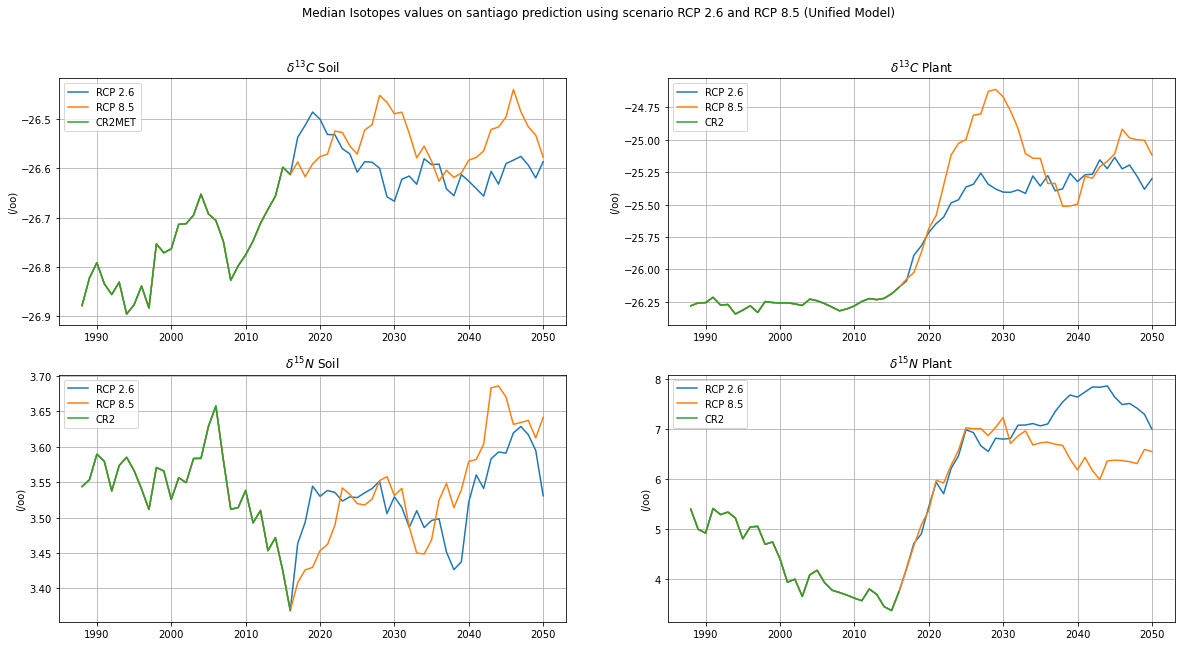

In [327]:

plt.figure(figsize=(20, 10), dpi=300)
fig, ax = plt.subplots(2,2)
fig.set_size_inches(20,10)
fig.suptitle('Median Isotopes values on ' +cuenca+ ' prediction using scenario RCP 2.6 and RCP 8.5 (Unified Model)')

time_list=list(range(1988,2051))
time_list_cr2=list(range(1988,2017))

rcp26 = moving_average(np.append(y_list_cr2[0][0], y_list[1][0][10:]), n=10)
rcp85 = moving_average(np.append(y_list_cr2[0][0], y_list[0][0][10:]), n=10)
#rcp26_std = moving_average(np.append(y_list_cr2[0][1], y_list[1][1][10:]), n=10)
#rcp85_std = moving_average(np.append(y_list_cr2[0][1], y_list[0][1][10:]), n=10)
ax[0,0].plot(time_list, rcp26, label = 'RCP 2.6')
ax[0,0].plot(time_list, rcp85, label = 'RCP 8.5')
ax[0,0].plot(time_list_cr2, rcp85[0:29], label = 'CR2MET')
ax[0,0].set_ylabel('(/oo)')
ax[0,0].set_title('$\delta^{13}C$ Soil')
ax[0,0].grid()
ax[0,0].legend()


rcp26 = moving_average(np.append(y_list_cr2[1][0], y_list[3][0][10:]), n=10)
rcp85 = moving_average(np.append(y_list_cr2[1][0], y_list[2][0][10:]), n=10)
ax[0,1].plot(time_list, rcp26, label = 'RCP 2.6')
ax[0,1].plot(time_list, rcp85, label = 'RCP 8.5')
ax[0,1].plot(time_list_cr2, rcp85[0:29], label = 'CR2')
ax[0,1].set_ylabel('(/oo)')
ax[0,1].set_title('$\delta^{13}C$ Plant')
ax[0,1].grid()
ax[0,1].legend()

rcp26 = moving_average(np.append(y_list_cr2[2][0], y_list[5][0][10:]), n=10)
rcp85 = moving_average(np.append(y_list_cr2[2][0], y_list[4][0][10:]), n=10)
ax[1,0].plot(time_list, rcp26, label = 'RCP 2.6')
ax[1,0].plot(time_list, rcp85, label = 'RCP 8.5')
ax[1,0].plot(time_list_cr2, rcp85[0:29], label = 'CR2')
ax[1,0].set_ylabel('(/oo)')
ax[1,0].set_title('$\delta^{15}N$ Soil')
ax[1,0].grid()
ax[1,0].legend()


rcp26 = moving_average(np.append(y_list_cr2[3][0], y_list[7][0][10:]), n=10)
rcp85 = moving_average(np.append(y_list_cr2[3][0], y_list[6][0][10:]), n=10)
ax[1,1].plot(time_list, rcp26, label = 'RCP 2.6')
ax[1,1].plot(time_list, rcp85, label = 'RCP 8.5')
ax[1,1].plot(time_list_cr2, rcp85[0:29], label = 'CR2')
ax[1,1].set_ylabel('(/oo)')
ax[1,1].set_title('$\delta^{15}N$ Plant')
ax[1,1].grid()
ax[1,1].legend()


#plt.savefig(cuenca+'_1988.png')

In [ ]:
df_predict = pd.DataFrame()

In [319]:
df_predict[cuenca+'_RCP26'] = rcp26
df_predict[cuenca+'_RCP85'] = rcp85

In [322]:
df_predict['year'] = time_list
df_predict.columns

Index(['arica_RCP26', 'arica_RCP85', 'atacama_RCP26', 'atacama_RCP85',
       'maule_RCP26', 'maule_RCP85', 'serena_RCP26', 'serena_RCP85',
       'santiago_RCP26', 'santiago_RCP85', 'year'],
      dtype='object')

In [323]:
df_predict = df_predict[['year', 'arica_RCP26', 'arica_RCP85', 'atacama_RCP26', 'atacama_RCP85',
       'maule_RCP26', 'maule_RCP85', 'serena_RCP26', 'serena_RCP85',
       'santiago_RCP26', 'santiago_RCP85']]

In [325]:
df_predict.to_csv('data/predictxcuenca_1988.csv', index=False)

<ErrorbarContainer object of 3 artists>

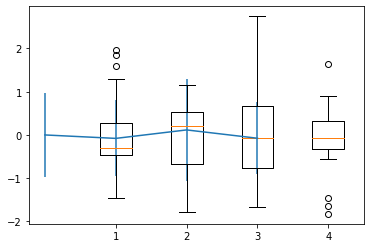

In [332]:
x = np.arange(4)
y = np.random.randn(20, 4)
plt.boxplot(y)
plt.errorbar(x, np.mean(y, axis=0), yerr=np.std(y, axis=0))

In [334]:
cuencas = ['arica', 'atacama', 'serena', 'santiago', 'maule']

In [343]:
df = pd.read_csv('data/predictxcuenca_1988.csv')

In [344]:
df

,year,arica_RCP26,arica_RCP85,atacama_RCP26,atacama_RCP85,maule_RCP26,maule_RCP85,serena_RCP26,serena_RCP85,santiago_RCP26,santiago_RCP85
0,1988,6.506731,6.506731,7.797064,7.797064,7.924199,7.924199,4.517177,4.517177,5.397186,5.397186
1,1989,6.480574,6.480574,7.808726,7.808726,7.873685,7.873685,4.332444,4.332444,4.992678,4.992678
2,1990,6.535742,6.535742,7.803043,7.803043,7.799834,7.799834,4.459077,4.459077,4.916751,4.916751
3,1991,6.594058,6.594058,7.830084,7.830084,8.133659,8.133659,4.422766,4.422766,5.410826,5.410826
4,1992,6.564500,6.564500,7.819332,7.819332,7.767928,7.767928,4.289384,4.289384,5.287555,5.287555
...,...,...,...,...,...,...,...,...,...,...,...
58,2046,7.163790,7.412393,6.865838,7.236247,8.412207,8.324247,5.046774,5.281246,7.497023,6.370307
59,2047,7.147874,7.391385,6.522518,7.162166,8.421782,8.288594,5.004073,5.312517,7.518555,6.350009
60,2048,7.179965,7.377451,6.461333,7.197173,8.437081,8.079867,4.791949,5.497079,7.424010,6.310675
61,2049,7.219354,7.220964,6.564346,6.797253,8.328829,8.159842,4.743828,5.273159,7.300354,6.595813


In [363]:
dif,cuen = [],[]
data = pd.DataFrame()
for cuenca in cuencas:
    dif_rcp26 = np.array(df[cuenca+'_RCP26'])[len(df['year'])-1]-np.array(df[cuenca+'_RCP26'])[0]
    dif_rcp85 = np.array(df[cuenca+'_RCP85'])[len(df['year'])-1]-np.array(df[cuenca+'_RCP85'])[0]
    dif.append(dif_rcp26)
    dif.append(dif_rcp85)
    cuen.append(cuenca)
    cuen.append(cuenca)
data['dif'] = dif
data['cuen'] = cuen             

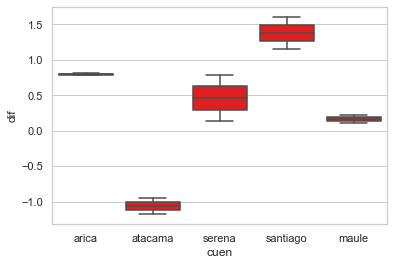

In [370]:
import seaborn as sns
#plt.figure(figsize=(1,1), dpi=300)
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
tips

ax = sns.boxplot(x="cuen", y="dif", data=data, color='red')



In [364]:
data

,dif,cuen
0,0.780884,arica
1,0.808535,arica
2,-1.180577,atacama
3,-0.952157,atacama
4,0.130099,serena
5,0.787157,serena
6,1.606612,santiago
7,1.156659,santiago
8,0.107378,maule
9,0.226669,maule
